In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from ga import Population
import strategies as S

In [3]:
p = Population(mutation_strength=0.02)

In [4]:
#p.add_strategy(S.ThresProposer, 100)
#p.add_strategy(S.ThresResponder, 100)
p.add_strategy(S.ProbProposer, 100)
p.add_strategy(S.ProbResponder, 100)
p.add_strategy(S.ChooserProposer, 100)
p.add_strategy(S.ChooserResponder, 100)


In [5]:
from tqdm import tqdm
for k in tqdm(range(500)):
    p.evolve()

 49%|████▉     | 245/500 [00:41<00:34,  7.48it/s]/home/dvyal/coding/ultimatum/ga/strategies.py:41: RuntimeWarning: invalid value encountered in true_divide
  self.proposition_probs /= np.sum(self.proposition_probs)
100%|██████████| 500/500 [01:03<00:00, 24.84it/s]


In [6]:
cp = S.ChooserProposer(bins=12)

In [7]:
import numpy as np

Text(0.5, 1.0, 'Mean proposal')

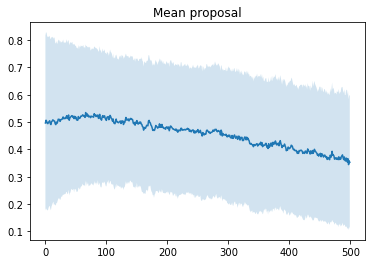

In [8]:
plt.plot(p.prop_mean_log)
plt.fill_between(range(len(p.prop_mean_log)), np.array(p.prop_mean_log) - np.array(p.prop_std_log), 
                             np.array(p.prop_mean_log) + np.array(p.prop_std_log), alpha=0.2)
plt.title('Mean proposal')

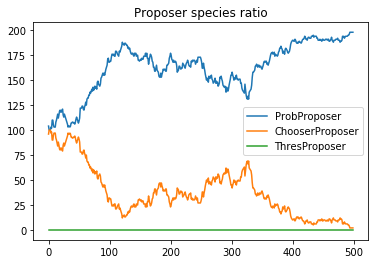

In [9]:
plt.plot([c['ProbProposer'] for c in p.proposer_counters], label='ProbProposer')
plt.plot([c['ChooserProposer'] for c in p.proposer_counters], label='ChooserProposer')
plt.plot([c['ThresProposer'] for c in p.proposer_counters], label='ThresProposer')
plt.title('Proposer species ratio')
plt.legend()

In [10]:
p.add_strategy(S.ThresProposer, 10)
p.add_strategy(S.ThresResponder, 10)

In [11]:
for k in tqdm(range(500)):
    p.evolve()

100%|██████████| 500/500 [00:09<00:00, 58.43it/s]


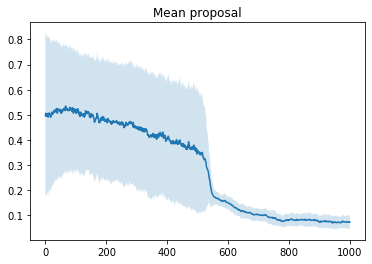

In [12]:
plt.title('Mean proposal')
plt.plot(p.prop_mean_log)
plt.fill_between(range(len(p.prop_mean_log)), np.array(p.prop_mean_log) - np.array(p.prop_std_log), 
                             np.array(p.prop_mean_log) + np.array(p.prop_std_log), alpha=0.2)

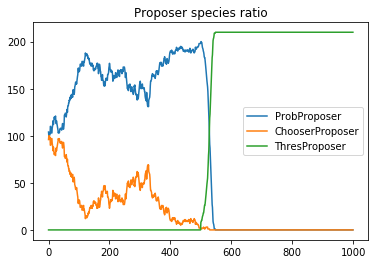

In [13]:
plt.title('Proposer species ratio')
plt.plot([c['ProbProposer'] for c in p.proposer_counters], label='ProbProposer')
plt.plot([c['ChooserProposer'] for c in p.proposer_counters], label='ChooserProposer')
plt.plot([c['ThresProposer'] for c in p.proposer_counters], label='ThresProposer')
plt.legend()